In [71]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os


In [72]:
data_dir = os.path.dirname(os.getcwd())
df=pd.read_csv(os.path.join(data_dir,"TSLA.csv"))
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [85]:
training_set = df.iloc[:1000, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [86]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
print(X_train.shape)

(940, 60, 1)


In [87]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 4s 46ms/step - loss: 0.1154
Epoch 2/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0213
Epoch 3/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0115: 0s - lo
Epoch 4/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0127
Epoch 5/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0117
Epoch 6/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0131
Epoch 7/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0103
Epoch 8/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0096
Epoch 9/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0098
Epoch 10/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0099
Epoch 11/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0084
Epoch 12/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0095
Epoch 13/100
30/

30/30 [==============================] - 1s 45ms/step - loss: 0.0025


In [88]:

dataset_test = df.iloc[60:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1259):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print("df shape",df.shape)
print("test shape",dataset_test.shape)
# (459, 60, 1)

(1199, 60, 1)
df shape (1259, 7)
test shape (1199, 1)


In [89]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

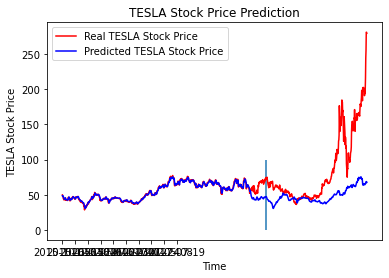

In [90]:
# Visualising the results
plt.plot(df.loc[60:, "Date"],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[60:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.vlines(800,0,100)
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()